# This script contains the following:


## 1. Importing Visualization Libraries and Data

## 2. Data Cleaning

## 3. Exploring Relationships

 Correlations
 
 Scatterplots
 
 Pair Plots
 
 Categorical Plots

# 1. Importing Visualization Libraries and Data¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [8]:
# set path
path =r'/Users/juliapetke/Desktop/Julia Petke- Boat Sale'


In [9]:
# Import Data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Boat Sale_data_cleaned.csv'),index_col = False)

In [10]:
df.head(5)


,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
0,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
3,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


# 2 Data Cleaning 

In [11]:
#As these graphs can only work with continuous variables, I need to ensure that all relevant columns have a numerical#data type that is compatible with the heatmap, scatterplot and other plots.
df.dtypes

Price                          object
Boat Type                      object
Manufacturer                   object
Type                           object
Year Built                      int64
Material                       object
Location                       object
Number of views last 7 days     int64
dtype: object

In [12]:
#  Split the 'Price' column into 'Currency' and 'Price'
df[['Currency', 'Price']] = df['Price'].str.extract(r'(\D+)\s*(\d+)', expand=True)


In [16]:
#  Insert the 'Currency' column next to the 'Price' column
cols = list(df.columns)
price_index = cols.index('Price')
cols.insert(price_index, cols.pop(cols.index('Currency')))
df = df[cols]

In [19]:
#Checking results
df.dtypes

Currency                       object
Price                          object
Boat Type                      object
Manufacturer                   object
Type                           object
Year Built                      int64
Material                       object
Location                       object
Number of views last 7 days     int64
dtype: object

In [20]:
df.head(5)

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
1,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
3,EUR,3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF,4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


In [22]:
#Now, we will drop 'Year Built'
df_new = df.drop(columns=['Year Built'])

In [2]:
#Create a correlation matrix using pandas
# Convert 'Price' and 'Number of views last 7 days' to numeric (if they are stored as int type)
df_new['Price'] = pd.to_numeric(df_new['Price'], errors='coerce')
df_new['Number of views last 7 days'] = pd.to_numeric(df_new['Number of views last 7 days'], errors='coerce')

from sklearn.preprocessing import LabelEncoder

#Encoding Categorical Columns (Like "Boat Type", "Material")
# Label encode categorical columns (e.g., Boat Type and Material)
le = LabelEncoder()
df_new['Boat Type'] = le.fit_transform(df_new['Boat Type'])
df_new['Material'] = le.fit_transform(df_new['Material'])



NameError: name 'pd' is not defined

In [51]:
df_new.head()

,Currency,Price,Boat Type,Manufacturer,Type,Material,Location,Number of views last 7 days
0,EUR,3490,36,Terhi power boats,new boat from stock,8,Germany Â» BÃ¶nningstedt,75
1,EUR,3399,62,Linder power boats,new boat from stock,0,Germany Â» Bayern Â» MÃ¼nchen,58
2,CHF,3500,62,Terhi power boats,"Used boat,Electric",2,Switzerland Â» Seengen,239
3,EUR,3500,99,GS Nautica power boats,Used boat,2,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
4,CHF,4600,96,Kimple power boats,new boat from stock,0,Switzerland Â» Zugersee Â» Neuheim,113


In [57]:
df_new.dtypes

Currency                       object
Price                           int64
Boat Type                       int64
Manufacturer                   object
Type                           object
Material                        int64
Location                       object
Number of views last 7 days     int64
dtype: object

## Correlation 

In [61]:
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df_new.select_dtypes(include=['int',])
#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()



,Price,Boat Type,Material,Number of views last 7 days
Price,1.000000,0.055462,-0.062498,-0.049560
Boat Type,0.055462,1.000000,0.069704,-0.089948
Material,-0.062498,0.069704,1.000000,-0.007693
Number of views last 7 days,-0.049560,-0.089948,-0.007693,1.000000


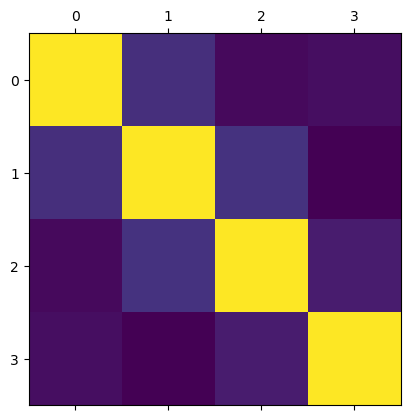

In [62]:
#Next we use the above data to create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

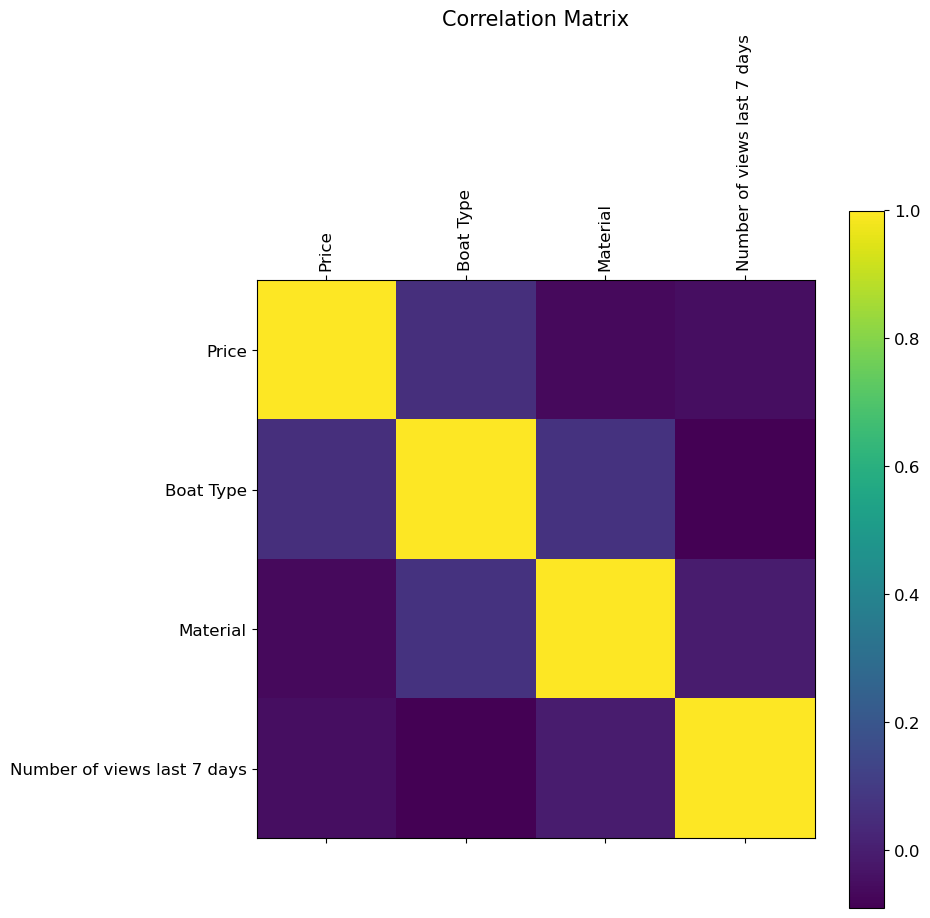

In [63]:
#Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

### As indicated by the legend, darker squares represent a stronger negative correlation between the two variables, while lighter squares signify a stronger positive correlation.

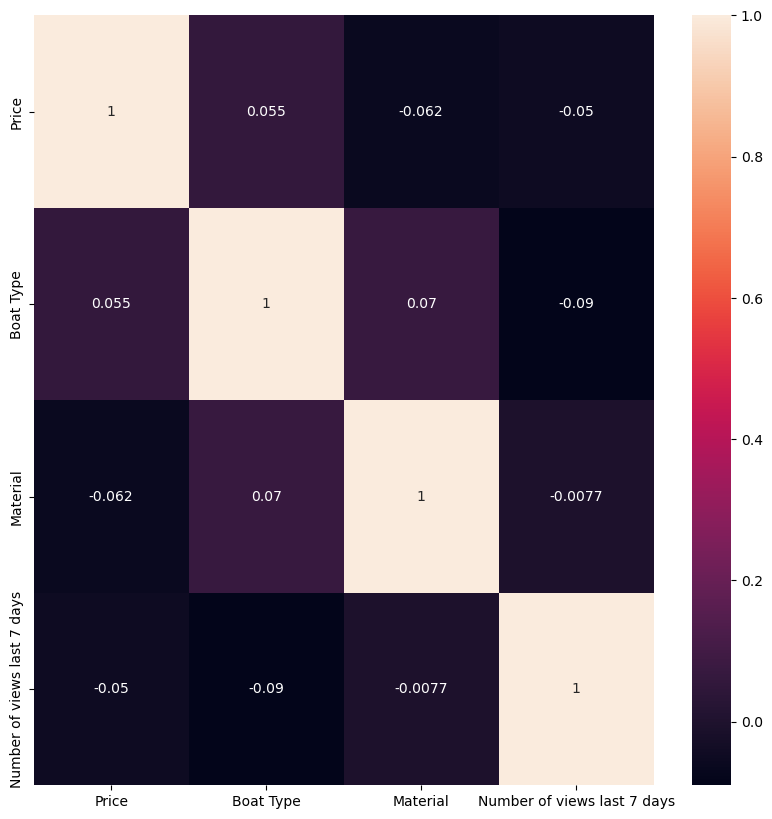

In [64]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Similarly, lighter colors indicate a stronger positive relationship, while darker colors represent a stronger negative relationship.


## Scatterplots

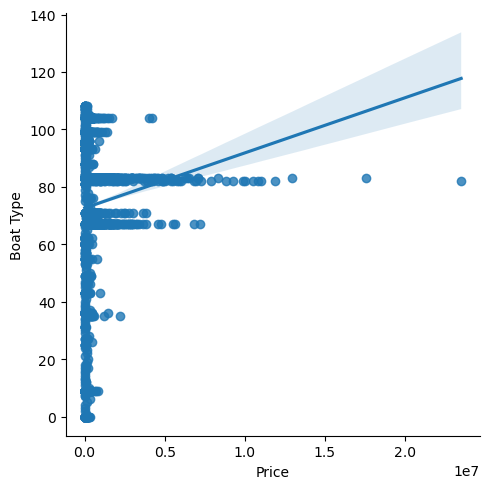

In [77]:
#Create a scatterplot for the "Boat Type" and "Price" columns in seaborn

sns.lmplot(y = 'Boat Type', x = 'Price', data = numerical_columns)

### The scatterplot suggests a positive correlation between boat type and price, indicating that certain boat types tend to be priced higher. Boat types encoded with higher numbers in the dataset are generally more expensive


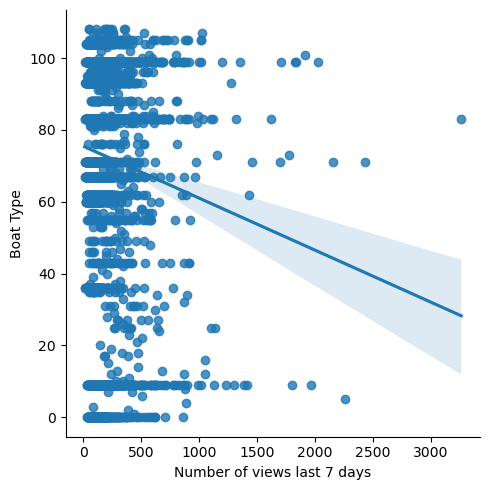

In [78]:
#Create a scatterplot for the "Boat Type" and "Materials" columns in seaborn

sns.lmplot(x = 'Number of views last 7 days', y = 'Boat Type', data = numerical_columns)

### The scatterplot suggests a weak negative correlation between boat type and the number of views, with some boat types generally attracting fewer views than others. However, there is considerable variation, and certain boat types seem to be consistently viewed across a wide range of "Number of views in the last 7 days."

# PairPlots

In [79]:
#Creating a segmented df with the variables being used in the pair plot
sub_df_new=numerical_columns[['Price', 'Boat Type', 'Material', 'Number of views last 7 days', ]]

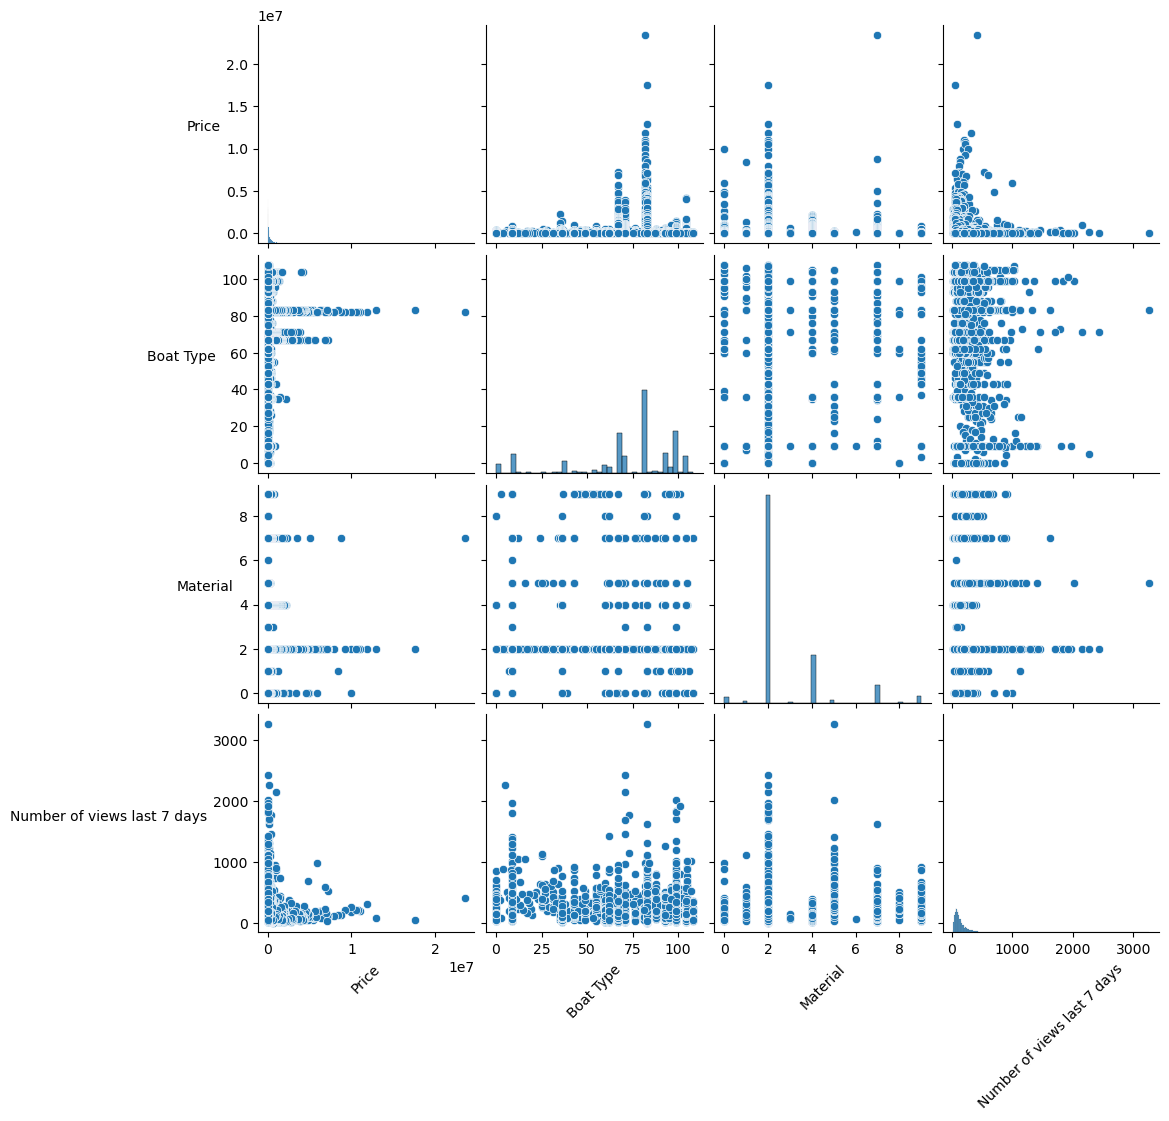

In [80]:
labels=['Price', 'Boat Type', 'Material', 'Number of views last 7 days',]
x=sns.pairplot(sub_df_new)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

# Categorical Plots

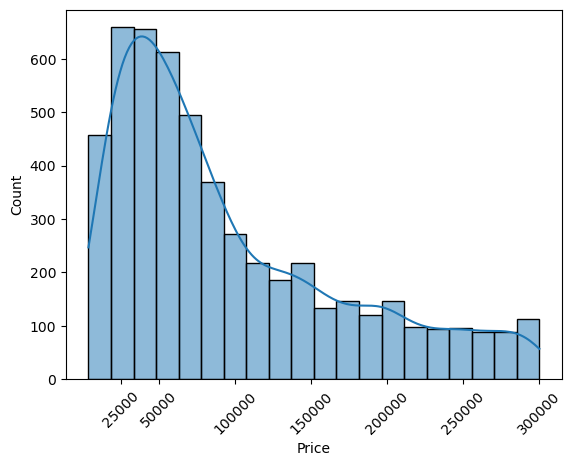

In [132]:

#Filter the DF to include rows where the prices is less than or equal to 300000

filtered_df = df_new[df['Price']<=300000]



sns.histplot(data=filtered_df, x='Price', bins=20, kde=True)
plt.xticks([25000, 50000, 100000, 150000, 200000, 250000, 300000], rotation=45)  # Set custom tick positions and rotate x-axis labels


plt.show()  # Show the plot

### Base on this we can create the following categories

Boat Price Range

Low Price < 5000

medium Price >5000 -  <100000

Higher Price >100000 

In [197]:
# Define price ranges and corresponding labels
bins = [-float('inf'), 5000, 100000, float('inf')]
labels = ['Low Price', 'Medium Price', 'High Price']

# Create a new column for price categories
df_new['Boat Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Display the DataFrame with the new column
df_new.head()

,Currency,Price,Boat Type,Manufacturer,Type,Material,Location,Number of views last 7 days,Boat Price Range
0,EUR,3490,36,Terhi power boats,new boat from stock,8,Germany Â» BÃ¶nningstedt,75,Low Price
1,EUR,3399,62,Linder power boats,new boat from stock,0,Germany Â» Bayern Â» MÃ¼nchen,58,Low Price
2,CHF,3500,62,Terhi power boats,"Used boat,Electric",2,Switzerland Â» Seengen,239,Low Price
3,EUR,3500,99,GS Nautica power boats,Used boat,2,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,Low Price
4,CHF,4600,96,Kimple power boats,new boat from stock,0,Switzerland Â» Zugersee Â» Neuheim,113,Low Price


# Categorical Plots

In [262]:
#Creating a Price Range based on histogram plot
df_new.loc[(df_new['Price'] > 0) & (df_new['Price'] < 5000), 'Boat Price Range'] = 'Low Price'
df_new.loc[df_new['Price']>= 5000 & (df_new['Price']< 100000), 'Boat Price Range']='Medium Price'
df_new.loc[df_new['Price']>= 100000, 'Boat Price Range']='High Price'

In [263]:
df_new['Boat Price Range'].value_counts()


Boat Price Range
Medium Price    3448
High Price      3141
Low Price          0
Name: count, dtype: int64

In [264]:
final_filter_df=df_new[df_new['Price']<=300000]

AttributeError: 'str' object has no attribute 'get'

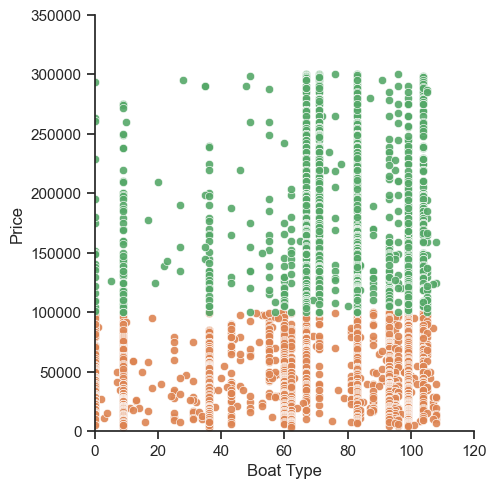

In [265]:
#Creating categorical plot with Boat Price Range
#Set the style for the plot
sns.set(style="ticks")

#Create a Facet Grid with separate scatter plots ???
price = sns.FacetGrid(final_filter_df, hue='Boat Price Range', height=5)
price.map(sns.scatterplot, 'Boat Type','Price', alpha=0.9)

#Set x-axis limits and ticks based on the data range
price.set(xlim=(0, 120), ylim=(0, 350000))

#Set the legend outside the plot
price.add_legend(legend_data='Boat Price Range', bbox_to_anchor=(1.05, 0.8), loc='upper right')

plt.tight_layout()

plt.show()

TypeError: can only concatenate str (not "int") to str

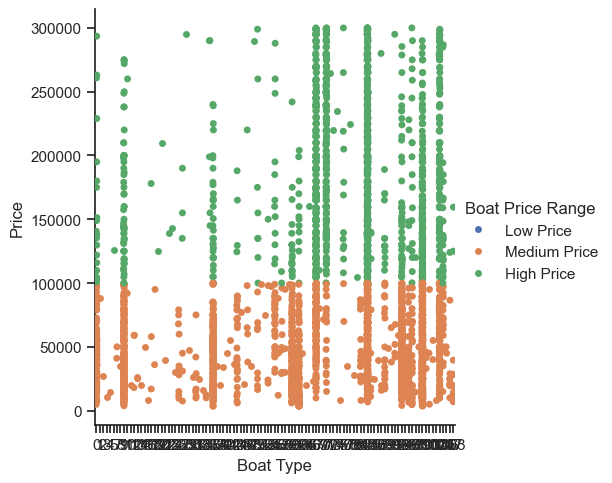

In [269]:
#Creating categorical plot with Net Worth anf Age
#Set the style for the plot
sns.set(style="ticks")

catplot_networth = sns.catplot(
    data=final_filter_df, x='Boat Type', y='Price', 
    hue='Boat Price Range')

#Establish x-axis limit by setting to length of df
plt.xticks(range(final_filter_df['Boat Price Range'].min(), final_filter_df['Boat Price Range'].max()+1))


#Set x-axis limits and ticks based on the data range
price.set(xlim=(0, 120), ylim=(0, 350000))


#Create a tight layout
plt.tight_layout()

plt.show()

In [252]:
df_new.dtypes

Currency                         object
Price                             int64
Boat Type                         int64
Manufacturer                     object
Type                             object
Material                          int64
Location                         object
Number of views last 7 days       int64
Boat Price Range               category
dtype: object

### What are the Top 10 Selling Boat?

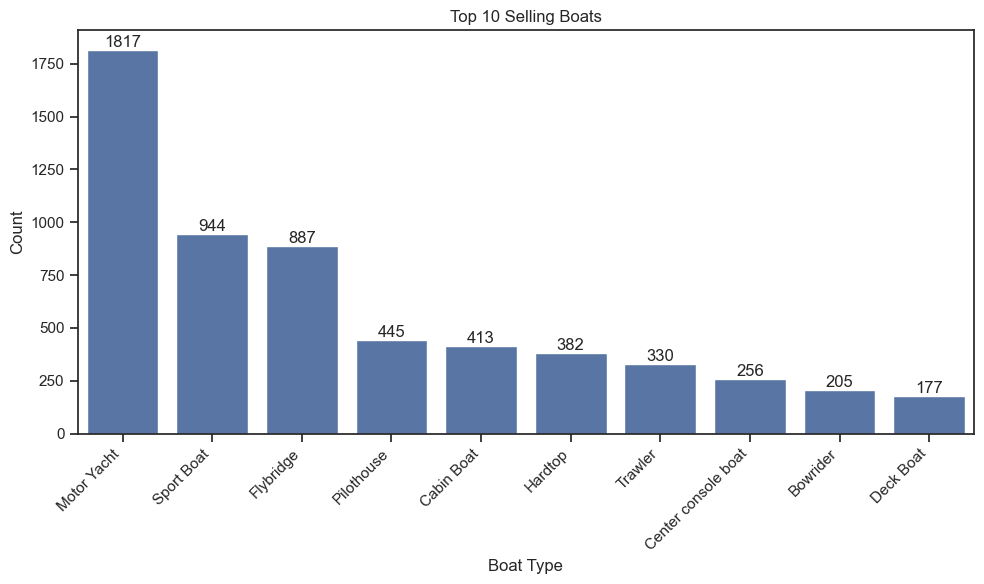

In [273]:

# Get the top 10 selling boat types based on the number of entries (counts)
top_selling_boat = df['Boat Type'].value_counts().head(10)

# Create a bar plot for the top 10 selling boats
plt.figure(figsize=(10, 6))
ab = sns.barplot(x=top_selling_boat.index, y=top_selling_boat.values)

# Optional: set y-axis to log scale
# plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis and y-axis labels
plt.xlabel('Boat Type')
plt.ylabel('Count')

# Set plot title
plt.title('Top 10 Selling Boats')

# Add labels on the bars
ab.bar_label(ab.containers[0])

# Ensure everything fits within the plot layout
plt.tight_layout()

# Show the plot
plt.show()

## What are the Best Manufacturer per Location (Based on Views)?

In [282]:
# Find the Best Manufacturer per Location (Based on Views)
# Group data by 'Location' and 'Manufacturer', then aggregate by sum of 'Number of views last 7 days'
location_manufacturer = df.groupby(['Location', 'Manufacturer'])['Number of views last 7 days'].sum().reset_index()

# Find the best manufacturer in each location based on the maximum number of views
best_manufacturer_by_location = location_manufacturer.loc[location_manufacturer.groupby('Location')['Number of views last 7 days'].idxmax()]

# Sort the results to see the best manufacturers across all locations
best_manufacturer_by_location_sorted = best_manufacturer_by_location.sort_values(by='Number of views last 7 days', ascending=False)

# Display the result
print(best_manufacturer_by_location_sorted)


                                               Location  \
1628        Germany Â» Kieler Bucht mit Fehmarn Â» Kiel   
4203          Switzerland Â» Neuenburgersee Â» Concise    
4120                    Switzerland Â» Le Landeron (NE)   
4050        Switzerland Â» Lake of Zurich Â» Altendorf    
3932       Switzerland Â» Lake Constance Â» Gottlieben    
...                                                 ...   
4473  United Kingdom Â» Ipswich, Suffolk, Ipswich, S...   
1791                                    Germany Â» Nord   
443                Croatia (Hrvatska) Â» Sibenik, (CRO)   
1152             France Â» Six-Fours-les-Plages, France   
2368                     Italy Â» Lazio Â» gaeta, Lazio   

                                    Manufacturer  Number of views last 7 days  
1628  Quicksilver (Brunswick Marine) power boats                         6567  
4203  Quicksilver (Brunswick Marine) power boats                         4596  
4120                        Bayliner power boats   

In [285]:
# Display as a styled table
styled_table = best_manufacturer_by_location_sorted.style.set_caption("Best Manufacturer by Location (Based on Views)")
styled_table

,Location,Manufacturer,Number of views last 7 days
1628,Germany Â» Kieler Bucht mit Fehmarn Â» Kiel,Quicksilver (Brunswick Marine) power boats,6567
4203,Switzerland Â» Neuenburgersee Â» Concise,Quicksilver (Brunswick Marine) power boats,4596
4120,Switzerland Â» Le Landeron (NE),Bayliner power boats,3263
4050,Switzerland Â» Lake of Zurich Â» Altendorf,Regal power boats,3058
3932,Switzerland Â» Lake Constance Â» Gottlieben,Frauscher power boats,2955
4074,Switzerland Â» Lake of Zurich Â» Kilchberg,Boesch power boats,2567
4212,Switzerland Â» Neuenburgersee Â» Hauterive,Princess power boats,2432
3967,Switzerland Â» Lake Constance Â» Uttwil,Jeanneau power boats,2403
3810,Switzerland Â» Bouveret,VBoats power boats,2333
4029,Switzerland Â» Lake Geneva Â» Romanel,Smartliner power boats,2306


### How does the price of a boat correlate with the number of views it receives?

Correlation between Price and Number of Views: -0.05


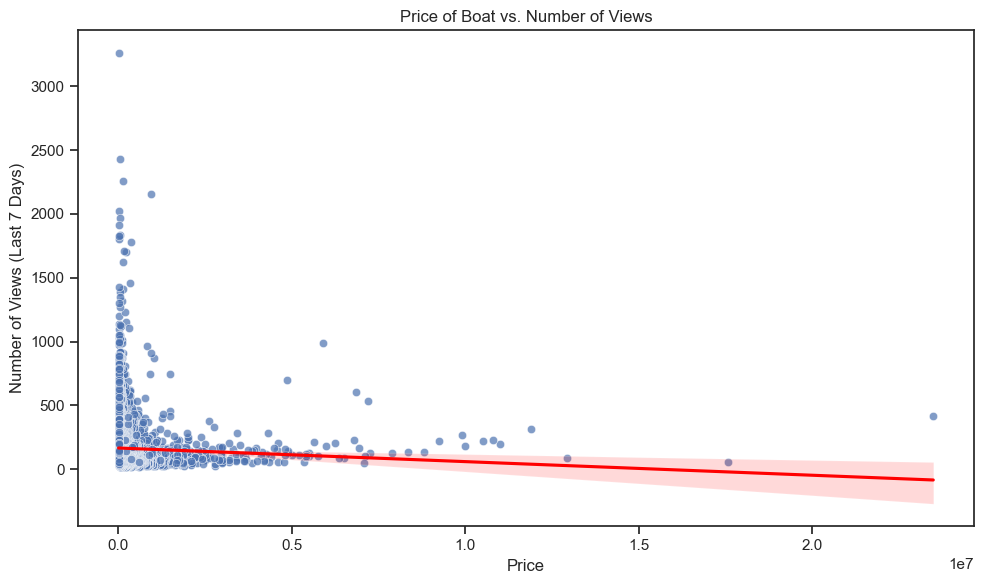

In [289]:

# Calculate the correlation coefficient
correlation = df_new['Price'].corr(df_new['Number of views last 7 days'])
print(f'Correlation between Price and Number of Views: {correlation:.2f}')

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Number of views last 7 days', data=df_new, alpha=0.7)

# Add a regression line to the plot
sns.regplot(x='Price', y='Number of views last 7 days', data=df_new, scatter=False, color='red')

# Set the labels and title
plt.title('Price of Boat vs. Number of Views')
plt.xlabel('Price')
plt.ylabel('Number of Views (Last 7 Days)')
plt.tight_layout()

# Show the plot
plt.show()

## Exploring Hypothesis and Key Questions


## Given the fact that we were told that we would use a geospatial analysis, the questions answered and hypotheses raised  so far can be aligned with a geospatial approach. Here are a few key ones:

### Question 1 : Which location has the best manufacturer?
Hypothesis: Locations with more manufacturers have a higher average number of views per boat listing.

A: Germany Â» Kieler Bucht mit Fehmarn Â» Kiel, has the best manufacturer. with the highest view of 6567

### Question 2: What are the Top selling boat
A: Motor Yacht in first place, followed by Sport Boat and in third place Flybridge